# Electric Machinery Fundamentals 5th edition
## Chapter 2 (Code examples)

## Example 2-10
**Calculate and plot the magnetization current of a 230/115 transformer operating at 230 volts and 50/60 Hz.  This program also calculates the rms value of the mag. current.**

Import the PyLab namespace (provides set of useful commands and constants like Pi)

In [1]:
%pylab inline
%config InlineBackend.figure_formats={'svg',}  # use high quality SVG instead of PNGs

Populating the interactive namespace from numpy and matplotlib


The magnetization curve for this transformer is shown in Figure 2-45, and can be found in [mag_curve_1.dat](data/mag_curve_1.dat) at [this book's web site](http://www.mhhe.com/engcs/electrical/chapman/).

<img src="figs/FigC_2-45.jpg" width="66%">

In [2]:
# import the pandas library which provides useful data processing functions
import pandas as pd  
# The data file is stored in the "data/" subfolder
fileUrl = 'data/mag_curve_1.dat'
# Now we read the file in:
data = pd.read_csv(fileUrl,     # the address where to download the datafile from
                   sep=' ',     # our data source uses a blank space as separation
                   comment='%', # ignore lines starting with a "%" 
                   skipinitialspace = True,  # ignore intital spaces
                   header=None, # we don't have a header line defined...
                   names=['mmf_data','flux_data'] # ...instead we define the names here
                   ) 

Initialize values:

In [3]:
VM = 325.0                 # Maximum voltage (V)
NP = 850                   # Primary turns

Calculate angular velocity for 60 Hz:

In [4]:
freq = 60              # Freq (Hz)
w = 2 * pi * freq

Calculate flux versus time:

In [5]:
time = arange(0, 1/30, 1/3000)       # 0 to 1/30 sec
flux = -VM/(w*NP) * cos(w * time)

Calculate the mmf corresponding to a given flux using the interpolation function:

In [6]:
mmf=interp(flux, data['flux_data'], data['mmf_data'])

Calculate the magnetization current:

In [7]:
im60 = mmf / NP

Calculate the rms value of the current:

In [8]:
irms60 = sqrt(sum(im60**2)/im60.size)

Calculate angular velocity for 50 Hz:

In [9]:
freq = 50              # Freq (Hz)
w = 2 * pi * freq

Calculate flux versus time:

In [10]:
time = arange(0, 1.0/30, 1.0/3000)       # 0 to 1/30 sec
flux = -VM/(w*NP) * cos(w * time)

Calculate the mmf corresponding to a given flux using the interpolation function:

In [11]:
mmf=interp(flux, data['flux_data'], data['mmf_data'])

Calculate the magnetization current:

In [12]:
im50 = mmf / NP

Calculate the rms value of the current:

In [13]:
irms50 = sqrt(sum(im50**2)/im50.size)

**Resultant rms values are:**

In [14]:
print('The rms current at 60 Hz is {:.3f} A.'.format(irms60))
print('The rms current at 50 Hz is {:.3f} A.'.format(irms50))

The rms current at 60 Hz is 0.485 A.
The rms current at 50 Hz is 0.808 A.


**Plot the magnetization current:**

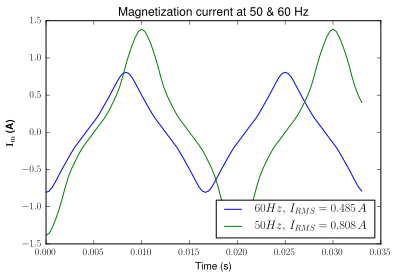

In [15]:
rc('text', usetex=True)   # enable LaTeX commands for plot
title('Magnetization current at 50 \& 60 Hz')
xlabel('Time (s)')
ylabel(r'$\mathbf{I_m}$ \textbf{(A)}')
plot(time,im60, time, im50)
legend(('$60 Hz,\, I_{{RMS}} = {:.3f}\,A$'.format(irms60),
        '$50 Hz,\, I_{{RMS}} = {:.3f}\,A$'.format(irms50)), loc=4);